In [4]:
#Features (1 sim, 2 não)
#Pelo longo
#Perna curta
# Faz auau

porco1 = [0, 1, 0]
porco2 = [0, 1, 1]
porco3 = [1, 1, 0]

cachorro1 = [0, 1, 1]
cachorro2 = [1, 0, 1]
cachorro3 = [1, 1, 1]

In [5]:
treino_x = [porco1,porco2,porco3,cachorro1,cachorro2,cachorro3]

In [6]:
#1 => porco / 2 => cachorro
treino_y = [1,1,1,0,0,0]

In [7]:
from sklearn.svm import LinearSVC

model = LinearSVC()
model.fit(treino_x, treino_y)

LinearSVC()

In [8]:
animal_misterioso = [1,1,1]
model.predict([animal_misterioso])

array([0])

In [9]:
misterio1 = [1,1,1]
misterio2 = [1,1,0]
misterio3 = [0,1,1]

teste_x = [misterio1, misterio2, misterio3]
previsoes = model.predict(teste_x)

In [10]:
teste_y = [0,1,1]

In [11]:
previsoes == teste_y

array([ True,  True, False])

In [12]:
corretos = (previsoes == teste_y).sum()
total = len(teste_x)
taxa_de_acerto = corretos/total * 100
taxa_de_acerto

66.66666666666666

In [13]:
from sklearn.metrics import accuracy_score

taxa_de_acerto = accuracy_score(teste_y, previsoes) * 100
taxa_de_acerto

66.66666666666666

In [14]:
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/b9dd8e4b62b9e22ebcb9c8e89c271de4/raw/c69ec4b708fba03c445397b6a361db4345c83d7a/tracking.csv"
dados = pd.read_csv(uri)
dados.head()

,inicial,palestras,contato,comprou,patrocinio
0,1,1,0,0,0
1,1,1,0,0,0
2,1,1,0,0,0
3,1,1,0,0,0
4,1,1,0,0,0


In [15]:
y = dados['comprou']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: comprou, dtype: int64

In [16]:
x = dados[['inicial', 'palestras', 'contato', 'patrocinio']]
x.head()

,inicial,palestras,contato,patrocinio
0,1,1,0,0
1,1,1,0,0
2,1,1,0,0
3,1,1,0,0
4,1,1,0,0


In [17]:
dados.shape

(99, 5)

In [18]:
treino_x = x[:75]
treino_y = y[:75]

teste_x = x[75:]
teste_y = y[75:]

In [19]:
modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)
acuracia = accuracy_score(teste_y, previsoes) * 100
acuracia

95.83333333333334

In [20]:
from sklearn.model_selection import train_test_split

SEED = 9083745

treino_x, teste_x, treino_y, teste_y =  train_test_split(x, y, random_state = SEED, stratify=y)

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)
acuracia = accuracy_score(teste_y, previsoes) * 100
acuracia

100.0

In [21]:
treino_y.value_counts()

comprou
0    49
1    25
Name: count, dtype: int64

In [22]:
teste_y.value_counts()

comprou
0    17
1     8
Name: count, dtype: int64

In [23]:
import pandas as pd

uri2 = "https://gist.githubusercontent.com/guilhermesilveira/12291c548acaf544596795709020e3db/raw/325bdef098bd9cbc2189215b7e32e22f437f29f3/projetos.csv"
dados2 = pd.read_csv(uri2)
dados2

,nao_finalizado,horas_esperadas,preco
0,0,75.0,6985.000000
1,1,0.0,4325.293458
2,0,87.0,14205.000000
3,1,13.0,100.000000
4,0,2.0,202.000000
...,...,...,...
2452,0,96.0,21115.000000
2453,1,1.0,172.000000
2454,0,0.0,526.775512
2455,1,16.0,184.000000


In [24]:
dados2['finalizado'] = dados2['nao_finalizado'].map({1: 0, 0: 1})
dados2

,nao_finalizado,horas_esperadas,preco,finalizado
0,0,75.0,6985.000000,1
1,1,0.0,4325.293458,0
2,0,87.0,14205.000000,1
3,1,13.0,100.000000,0
4,0,2.0,202.000000,1
...,...,...,...,...
2452,0,96.0,21115.000000,1
2453,1,1.0,172.000000,0
2454,0,0.0,526.775512,1
2455,1,16.0,184.000000,0


<Axes: xlabel='horas_esperadas', ylabel='preco'>

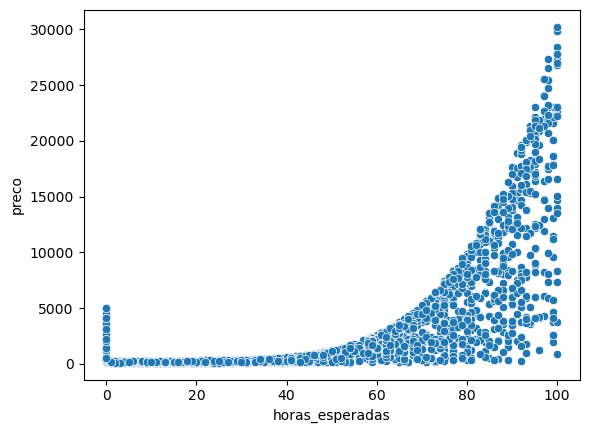

In [25]:
import seaborn as sns

sns.scatterplot(x='horas_esperadas', y='preco', data=dados2)

<Axes: xlabel='horas_esperadas', ylabel='preco'>

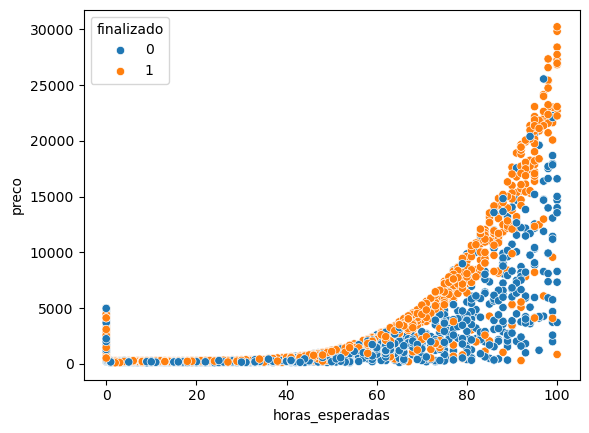

In [26]:
sns.scatterplot(x='horas_esperadas', y='preco', data=dados2, hue='finalizado')

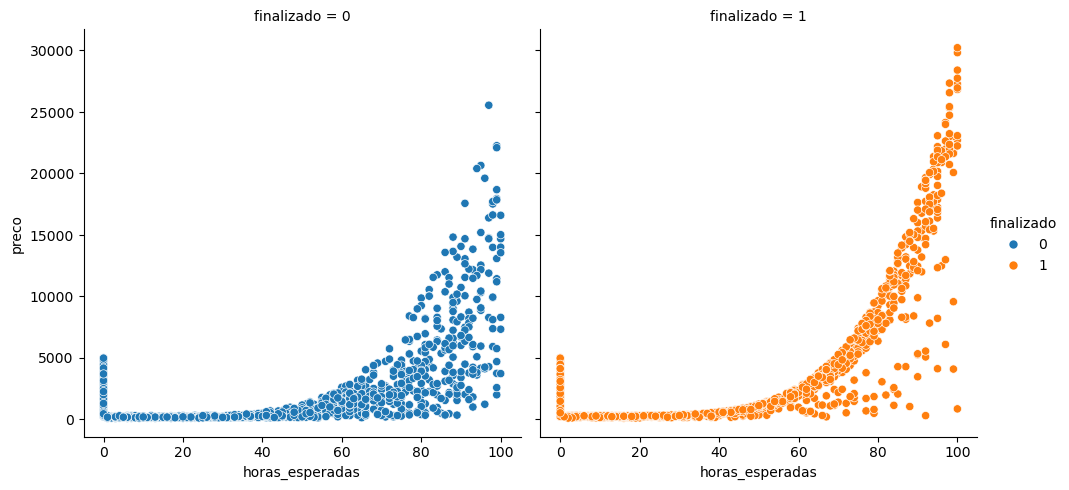

In [27]:
sns.relplot(x='horas_esperadas', y='preco', data=dados2, hue='finalizado', col='finalizado')

In [28]:
#jogar fora as linhas que as horas são iguais a 0
dados2 = dados2.query('horas_esperadas > 0')
dados2

,nao_finalizado,horas_esperadas,preco,finalizado
0,0,75.0,6985.0,1
2,0,87.0,14205.0,1
3,1,13.0,100.0,0
4,0,2.0,202.0,1
5,0,49.0,1096.0,1
...,...,...,...,...
2451,0,87.0,11699.0,1
2452,0,96.0,21115.0,1
2453,1,1.0,172.0,0
2455,1,16.0,184.0,0


In [29]:
x = dados2[['horas_esperadas', 'preco']]
y = dados2['finalizado']

In [30]:
SEED = 236734

train_x, test_x, train_y, test_y =  train_test_split(x, y, random_state = SEED, stratify=y)

modelo = LinearSVC()
modelo.fit(train_x, train_y)
previsoes = modelo.predict(test_x)
acuracia = accuracy_score(test_y, previsoes) * 100
acuracia

57.592592592592595

In [31]:
previsoes_de_base = test_y.sum() / len(test_y) * 100

In [36]:
x_min = test_x['horas_esperadas'].min()
x_max = test_x['horas_esperadas'].max()
y_min = test_x['preco'].min()
y_max = test_x['preco'].max()

In [37]:
import numpy as np

pixels = 100

eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_x

eixo_y  = np.arange(y_min, y_max, (y_max - y_min) / pixels)
eixo_y

array([  101.  ,   383.97,   666.94,   949.91,  1232.88,  1515.85,
        1798.82,  2081.79,  2364.76,  2647.73,  2930.7 ,  3213.67,
        3496.64,  3779.61,  4062.58,  4345.55,  4628.52,  4911.49,
        5194.46,  5477.43,  5760.4 ,  6043.37,  6326.34,  6609.31,
        6892.28,  7175.25,  7458.22,  7741.19,  8024.16,  8307.13,
        8590.1 ,  8873.07,  9156.04,  9439.01,  9721.98, 10004.95,
       10287.92, 10570.89, 10853.86, 11136.83, 11419.8 , 11702.77,
       11985.74, 12268.71, 12551.68, 12834.65, 13117.62, 13400.59,
       13683.56, 13966.53, 14249.5 , 14532.47, 14815.44, 15098.41,
       15381.38, 15664.35, 15947.32, 16230.29, 16513.26, 16796.23,
       17079.2 , 17362.17, 17645.14, 17928.11, 18211.08, 18494.05,
       18777.02, 19059.99, 19342.96, 19625.93, 19908.9 , 20191.87,
       20474.84, 20757.81, 21040.78, 21323.75, 21606.72, 21889.69,
       22172.66, 22455.63, 22738.6 , 23021.57, 23304.54, 23587.51,
       23870.48, 24153.45, 24436.42, 24719.39, 25002.36, 25285

In [41]:
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos

array([[1.000000e+00, 1.010000e+02],
       [1.990000e+00, 1.010000e+02],
       [2.980000e+00, 1.010000e+02],
       ...,
       [9.703000e+01, 2.811503e+04],
       [9.802000e+01, 2.811503e+04],
       [9.901000e+01, 2.811503e+04]])

In [46]:
Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)
Z

c:\Users\mathe\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=int64)

In [47]:
import matplotlib.pyplot as plt

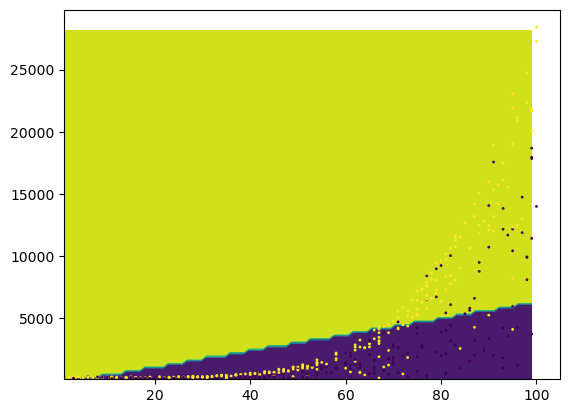

In [49]:
plt.contourf(xx, yy, Z)
plt.scatter(test_x['horas_esperadas'], test_x['preco'], c=test_y, s=1)